# Airlines Delay

### Project developed by:
- Anete Pereira (up202008856)
- Anthony Silva (up202211080)
- Eduardo Silva (up202004999)

## Table of Contents



## Introduction

The goal of this project is to apply supervised learning techniques to predict flight delays using a provided dataset. The dataset contains information related to airlines and flight records, and our task is to predict whether a flight will be delayed or not. We will explore the dataset, perform data analysis, preprocess the data if necessary, and then apply some supervised learning algorithms such as Decision Trees, Neural Networks, K-NN, and SVM. 
The performance of these models will be evaluated using metrics like accuracy, precision, recall, and F1 measure. 
Our aim is to compare the performance of different algorithms and determine the most effective approach for predicting flight delays.
This notebook covers the approach to the problem, how it was elaborated and the analysis of the results obtained.




## Bibliography

RAM000574, Dataset "Students' dropout and academic success" used, URL: https://www.kaggle.com/datasets/tulasiram574/students-dropout-and-academic-success <br>
NumPy Developers, Numpy documentation, URL: https://numpy.org/doc/stable/user/index.html#user <br>
pandas development team, pandas documentation, URL: https://pandas.pydata.org/docs/user_guide/index.html#user-guide<br>
Matplotlib Development team, Matplotlib documentation, URL: https://matplotlib.org/stable/index.html <br>
scikit-learn developers, scikit-learn documentation, URL: https://scikit-learn.org/0.18/documentation.html<br>

## Approach


The approach to this project was done as follows:

1. **Data analysis**: First we analyzed the dataset to inspect for the need for data pre-processing: checked the corresponding histograms, class distribution, and the existence of missing or null values.
2. **Algorithm implementation**: Flowing that, we defined the training and test sets using train/test split, resampled the dataset, and applied the SciKit Learn's algorithms to obtain the first results.
3. **Evaluation and refinement**: After analyzing the first results, tunning of each algorithm was done utilizing the SciKit Learn GridSearchCV to find the parameters of each algorithm that yielded the best overall results, and evaluated the final results.

## Used Libraries

- **NumPy**: Provides a fast numerical array structure and helper functions.
- **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
- **matplotlib**: The essential Machine Learning package in Python.
- **sklearn**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
- **seaborn**: Advanced statistical plotting library.
- **pycaret**: Offers streamlined workflows and a wide range of pre-built algorithms and techniques to experiment with different models and compare their performance using different evaluation metrics.


## Data analysis

We start by importing the required libraries and plotting some graphs for initial analysis of the dataset.

In [23]:
import data_manip
import os
import model_test
import warnings
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from enum import Enum
import seaborn as sb
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
#from pycaret.classification import *
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%pip install imbalanced-learn


# Set the warning filter to "ignore"
warnings.filterwarnings("ignore", category=UserWarning)


dataset = pd.read_csv('airlines_delay_original.csv', na_values=['NA'], delimiter=",")

dataset.head()

Note: you may need to restart the kernel to use updated packages.


,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


In [24]:
dataset.describe()

,Flight,Time,Length,DayOfWeek,Class
count,539382.000000,539382.000000,539382.000000,539382.000000,539382.000000
mean,2427.927988,802.728161,132.202104,3.929666,0.445443
std,2067.431700,278.045546,70.117045,1.914666,0.497015
min,1.000000,10.000000,0.000000,1.000000,0.000000
25%,712.000000,565.000000,81.000000,2.000000,0.000000
50%,1809.000000,795.000000,115.000000,4.000000,0.000000
75%,3745.000000,1035.000000,162.000000,5.000000,1.000000
max,7814.000000,1439.000000,655.000000,7.000000,1.000000


#### Checking for null values

In [25]:
dataset.isna().sum()

Flight         0
Time           0
Length         0
Airline        0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Class          0
dtype: int64

### Data Encoding

In [26]:
data_encoded = dataset.copy()

# Combine "AirportFrom" and "AirportTo" columns to create a unified set of airports
airports = pd.concat([data_encoded['AirportFrom'], data_encoded['AirportTo']])

# Perform label encoding on the combined set of airports
label_encoder_airports = LabelEncoder()
encoded_airports = label_encoder_airports.fit_transform(airports)

# Perform label encoding on the "Airline" column
label_encoder_airline = LabelEncoder()
data_encoded['Airline'] = label_encoder_airline.fit_transform(data_encoded['Airline'])

# Update "AirportFrom" and "AirportTo" columns with the encoded values
data_encoded['AirportFrom'] = encoded_airports[:len(data_encoded)]
data_encoded['AirportTo'] = encoded_airports[len(data_encoded):]

# Remove the "Flight" column
data_encoded = data_encoded.drop('Flight', axis=1)

#### Checking the correlation of values

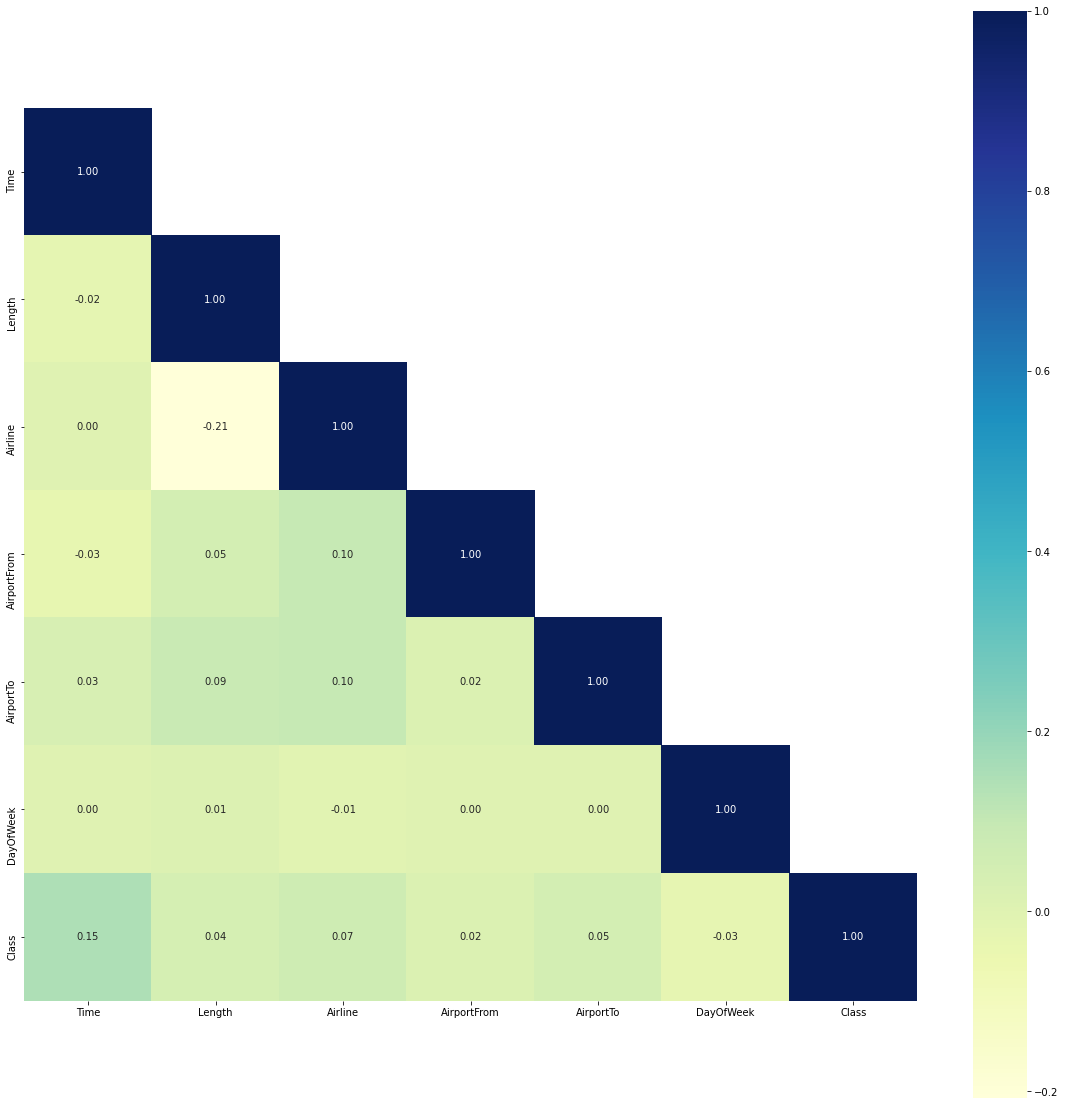

In [27]:
dataset_corr = data_encoded.corr()
plt.figure(figsize=(20,20))
mask = np.zeros_like(dataset_corr)
mask[np.triu_indices_from(mask, k=1)] = True
sb.heatmap(dataset_corr, cmap="YlGnBu", annot=True, square=True, mask=mask, fmt='.2f', annot_kws={"size": 10});
plt.show()

### All Data Histogram

array([[<AxesSubplot:title={'center':'Time'}>,
        <AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Airline'}>],
       [<AxesSubplot:title={'center':'AirportFrom'}>,
        <AxesSubplot:title={'center':'AirportTo'}>,
        <AxesSubplot:title={'center':'DayOfWeek'}>],
       [<AxesSubplot:title={'center':'Class'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

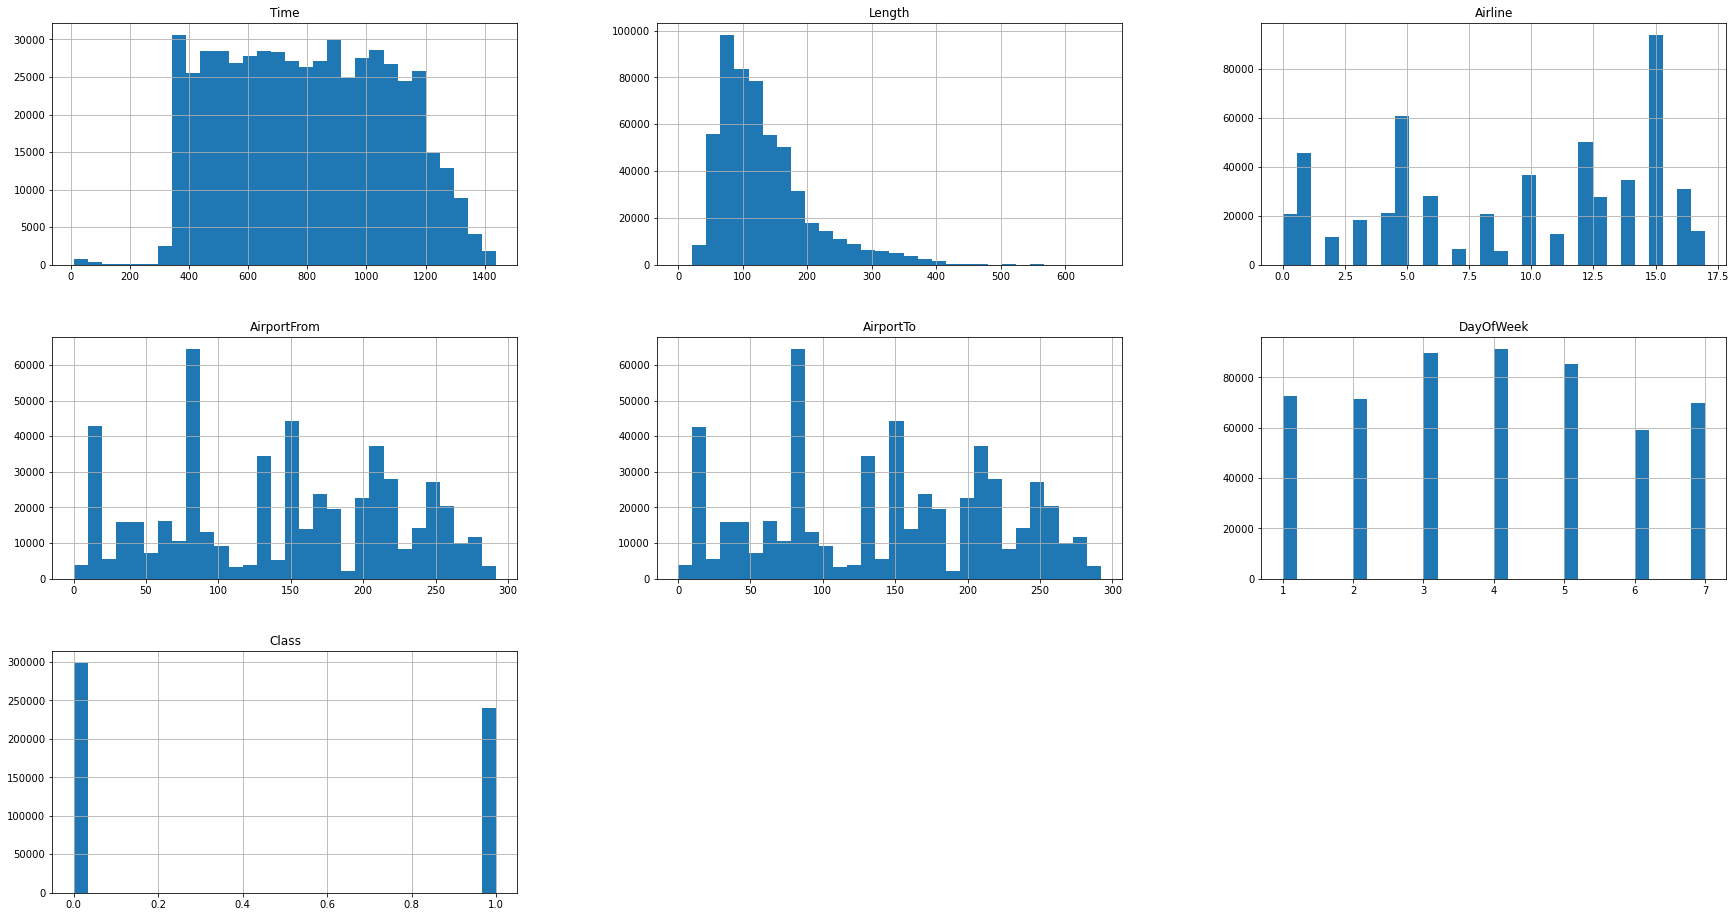

In [28]:
data_encoded.hist(bins=30, figsize=(30, 16), sharey=False)

- Relation between the day of the week and delay in flights

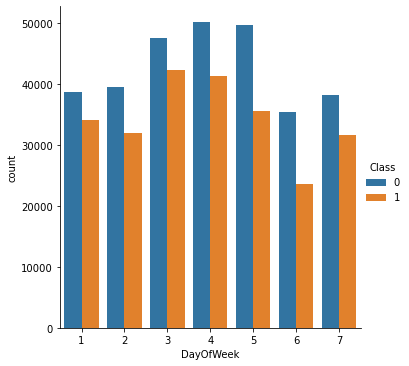

In [29]:
sb.catplot(x="DayOfWeek", kind="count", data=data_encoded, hue="Class")

- Relation between the airline and delay in flights

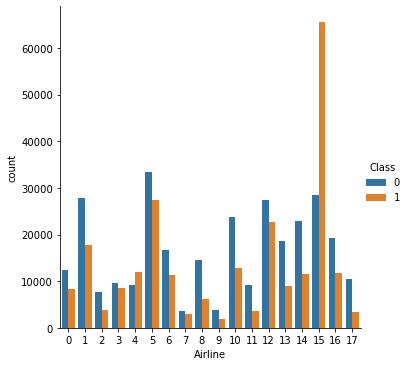

In [30]:
sb.catplot(x="Airline", kind="count", data=data_encoded, hue="Class")

### The dataset is slightly imbalanced

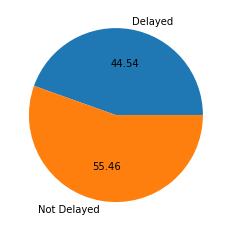

In [31]:
fraud_df_pie_chart = data_encoded.loc[data_encoded['Class'] == 1.0]
not_fraud_df_pie_chart = data_encoded.loc[data_encoded['Class'] == 0.0]

array_pie_chart = np.array([len(fraud_df_pie_chart), len(not_fraud_df_pie_chart)])
pie_chart_labels = ["Delayed", "Not Delayed"]

plt.pie(array_pie_chart, labels=pie_chart_labels, autopct='%.2f')
plt.show()

## Data Preprocessing

After examining the dataset and assessing its characteristics, we conducted a comprehensive analysis. The results revealed a high level of data consistency, with no missing values or notable outliers observed. As a consequence, the dataset demonstrated a remarkable level of readiness for analysis, requiring minimal data preprocessing efforts.

In [32]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539382 entries, 0 to 539381
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Time         539382 non-null  float64
 1   Length       539382 non-null  float64
 2   Airline      539382 non-null  int32  
 3   AirportFrom  539382 non-null  int32  
 4   AirportTo    539382 non-null  int32  
 5   DayOfWeek    539382 non-null  int64  
 6   Class        539382 non-null  int64  
dtypes: float64(2), int32(3), int64(2)
memory usage: 22.6 MB


### Train and Test split data

In [33]:
data_encoded['Class'] = data_encoded['Class'].astype('category')

col_names = list(data_encoded.columns)
col_names.remove('Class')

inputs = data_encoded[col_names].values
labels = data_encoded['Class'].values

In [34]:
from sklearn.model_selection import train_test_split

(train_in,
 test_in,
 train_classes,
 test_classes) = train_test_split(inputs, labels, test_size=0.25, random_state=1, stratify=labels)


The data analyses showed us that our working dataset is unbalanced. We implemented both undersampling and oversampling. Undersampling removes samples from majority categories, while oversampling duplicates samples from minority categories. Generally oversampling is preferred

In [35]:
from collections import Counter

print("---Train Set---")
print(Counter(train_classes))
print("\n---Test Set---")
print(Counter(test_classes))

---Train Set---
Counter({0: 224338, 1: 180198})

---Test Set---
Counter({0: 74780, 1: 60066})


In [36]:

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()

us_inputs, us_labels = rus.fit_resample(train_in, train_classes)

print(Counter(us_labels))

Counter({0: 180198, 1: 180198})


In [37]:
from imblearn.over_sampling import SMOTE

ros = SMOTE()

os_inputs, os_labels = ros.fit_resample(train_in, train_classes)

print(Counter(os_labels))

Counter({0: 224338, 1: 224338})


We used a StandardScaler from SciKit Learn's preprocessing library to standardize the data.

In [38]:
from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler()

scaler.fit(train_in)
train_in = scaler.fit_transform(train_in)
test_in = scaler.fit_transform(test_in)

scaler.fit(os_inputs)
os_inputs = scaler.fit_transform(os_inputs)

scaler.fit(us_inputs)
us_inputs = scaler.fit_transform(us_inputs)

# Classification

## K-Nearest Neighbors

### Original Dataset

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

classifier = KNeighborsClassifier()
classifier.fit(train_in, train_classes)
y_pred = classifier.predict(test_in)

result = confusion_matrix(test_classes, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(test_classes, y_pred)
print("Classification Report:",)
print (result1) 

knn_og_report = classification_report(test_classes, y_pred,output_dict=True)

Confusion Matrix:
[[50905 23875]
 [28152 31914]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.68      0.66     74780
           1       0.57      0.53      0.55     60066

    accuracy                           0.61    134846
   macro avg       0.61      0.61      0.61    134846
weighted avg       0.61      0.61      0.61    134846



### Undersampled Dataset

In [ ]:
classifier = KNeighborsClassifier()
classifier.fit(us_inputs, us_labels)
y_pred = classifier.predict(test_in)

knn_confusion_matrix = confusion_matrix(test_classes, y_pred)
print("Confusion Matrix:")
print(knn_confusion_matrix)
result1 = classification_report(test_classes, y_pred)
print("Classification Report:",)
print(result1)

knn_us_report = classification_report(test_classes, y_pred, output_dict=True)

### Oversampled Dataset

In [ ]:
classifier = KNeighborsClassifier()
classifier.fit(os_inputs, os_labels)
y_pred = classifier.predict(test_in)

result = confusion_matrix(test_classes, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(test_classes, y_pred)
print("Classification Report:",)
print (result1)

knn_os_report = classification_report(test_classes, y_pred,output_dict=True)

## Decision Tree Classifier

### Original Dataset

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(train_in, train_classes)
dtc_prediction = dtc.predict(test_in)

dtc_classification_report = classification_report(test_classes, dtc_prediction, output_dict=True)

print("--- Original dataset ---\n")
print("Confusion matrix:")
print(f"{confusion_matrix(test_classes, dtc_prediction)}\n")
print(f"Classification report:")
print(f"{classification_report(test_classes, dtc_prediction)}\n")


--- Original dataset ---

Confusion matrix:
[[53601 21179]
 [31661 28405]]

Classification report:
              precision    recall  f1-score   support

           0       0.63      0.72      0.67     74780
           1       0.57      0.47      0.52     60066

    accuracy                           0.61    134846
   macro avg       0.60      0.59      0.59    134846
weighted avg       0.60      0.61      0.60    134846




### Undersampled Dataset

In [ ]:
dtc.fit(us_inputs, us_labels)
dtc_prediction = dtc.predict(test_in)

dtc_us_classification_report = classification_report(test_classes, dtc_prediction, output_dict=True)

print("--- Undersampled dataset ---\n")
print(f"Confusion matrix:\n{confusion_matrix(test_classes, dtc_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, dtc_prediction)}\n")

### Oversampled Data

In [ ]:
dtc.fit(os_inputs, os_labels)
dtc_prediction = dtc.predict(test_in)

dtc_os_classification_report = classification_report(test_classes, dtc_prediction, output_dict=True)

print("--- Oversampled dataset ---\n")
print(f"Confusion matrix:\n{confusion_matrix(test_classes, dtc_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, dtc_prediction)}\n")

## SVM

### Original Dataset

In [50]:
svc = SVC()

svc.fit(train_in, train_classes)
y_pred = svc.predict(test_in)

result = confusion_matrix(test_classes, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(test_classes, y_pred)
print("Classification Report:",)
print (result1) 

svc_og_report = classification_report(test_classes, y_pred,output_dict=True)

### Undersampled Dataset

In [ ]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(us_inputs, us_labels)
y_pred = svc.predict(test_in)

result = confusion_matrix(test_classes, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(test_classes, y_pred)
print("Classification Report:",)
print (result1) 

svc_us_report = classification_report(test_classes, y_pred,output_dict=True)

### Oversampled Dataset

In [ ]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(os_inputs, os_labels)
y_pred = svc.predict(test_in)

result = confusion_matrix(test_classes, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(test_classes, y_pred)
print("Classification Report:",)
print (result1) 

svc_os_report = classification_report(test_classes, y_pred,output_dict=True)

## Result Analyses

### All algorithms

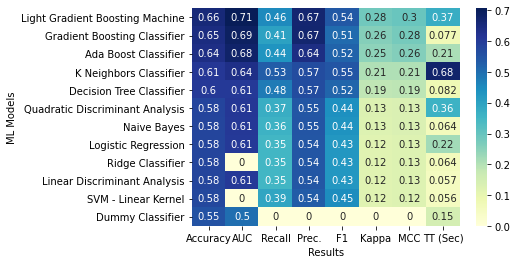

In [40]:

all_algorithms_data = pd.read_csv('models_comparison.csv', na_values=['NA'], delimiter=",")
all_algorithms_data.set_index("Model", inplace=True)

sb.heatmap(all_algorithms_data, cmap="YlGnBu", annot=True)
plt.xlabel('Results')
plt.ylabel('ML Models')
plt.show()


### Selected algorithms

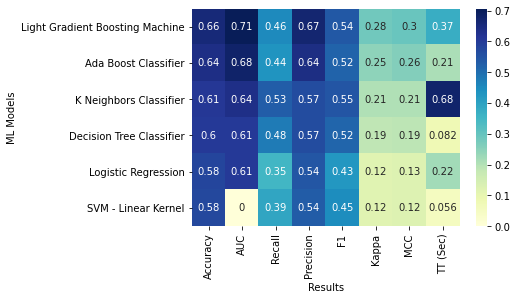

In [41]:

selected_algorithms_data = pd.read_csv('models_comparison_selected.csv', na_values=['NA'], delimiter=",")
selected_algorithms_data.set_index("Model", inplace=True)

sb.heatmap(selected_algorithms_data, cmap="YlGnBu", annot=True)
plt.xlabel('Results')
plt.ylabel('ML Models')
plt.show()


### Comparing Accuracys of each algorythm

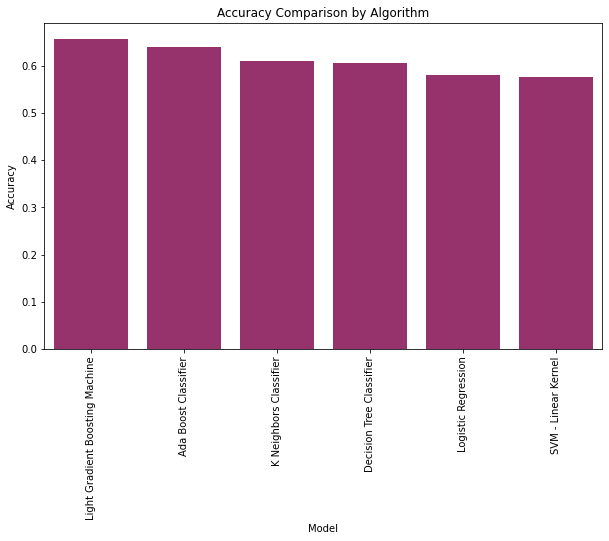

In [42]:
selected_algorithms_data = selected_algorithms_data.sort_values(by=['Accuracy'], ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
sb.barplot(x=selected_algorithms_data.index, y='Accuracy', data=selected_algorithms_data, color='#A7226E')

# Set the plot title and axis labels
plt.title('Accuracy Comparison by Algorithm')
plt.xlabel('Model')
plt.ylabel('Accuracy')

plt.xticks(rotation=90)

# Display the plot
plt.show()

### Comparing AUC (Area Under Curve) of each algorythm

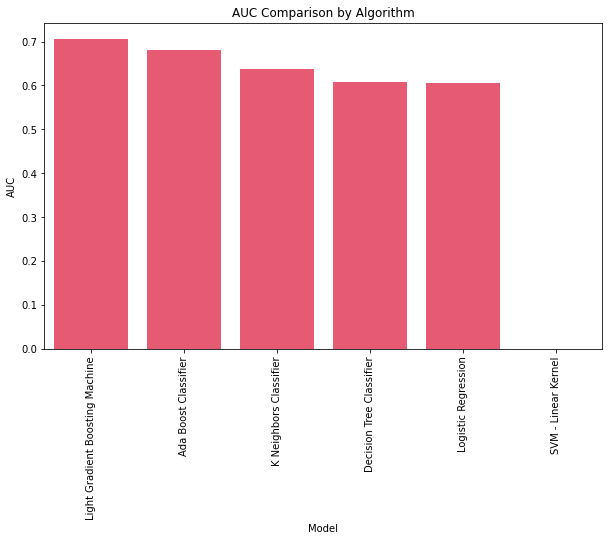

In [43]:
selected_algorithms_data = selected_algorithms_data.sort_values(by=['AUC'], ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
sb.barplot(x=selected_algorithms_data.index, y='AUC', data=selected_algorithms_data, color='#FE4365')

# Set the plot title and axis labels
plt.title('AUC Comparison by Algorithm')
plt.xlabel('Model')
plt.ylabel('AUC')

plt.xticks(rotation=90)

# Display the plot
plt.show()

### Comparing Recall of each algorythm

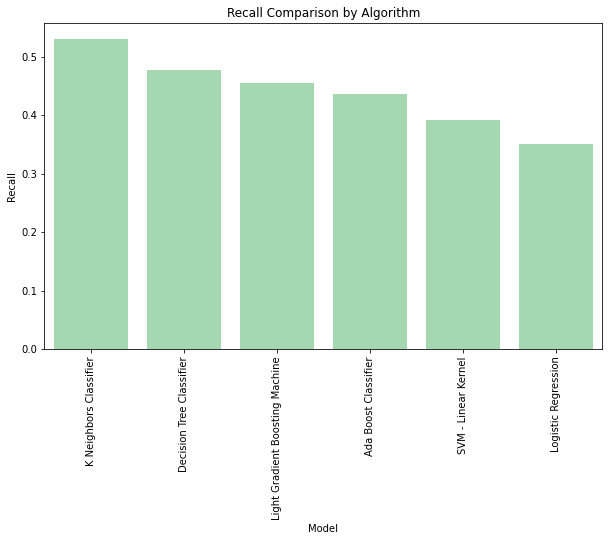

In [44]:
selected_algorithms_data = selected_algorithms_data.sort_values(by=['Recall'], ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
sb.barplot(x=selected_algorithms_data.index, y='Recall', data=selected_algorithms_data, color='#9DE0AD')

# Set the plot title and axis labels
plt.title('Recall Comparison by Algorithm')
plt.xlabel('Model')
plt.ylabel('Recall')

plt.xticks(rotation=90)

# Display the plot
plt.show()

### Comparing Precision of each algorythm

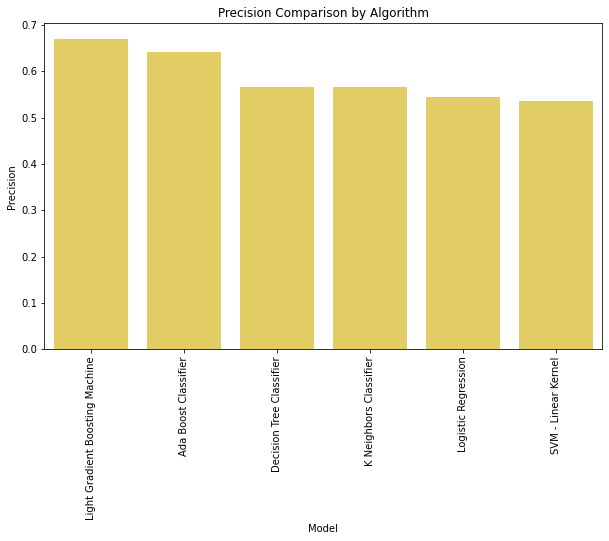

In [45]:
selected_algorithms_data = selected_algorithms_data.sort_values(by=['Precision'], ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
sb.barplot(x=selected_algorithms_data.index, y='Precision', data=selected_algorithms_data, color='#F7DB4F')

# Set the plot title and axis labels
plt.title('Precision Comparison by Algorithm')
plt.xlabel('Model')
plt.ylabel('Precision')

plt.xticks(rotation=90)

# Display the plot
plt.show()

### Comparing F1-score of each algorythm

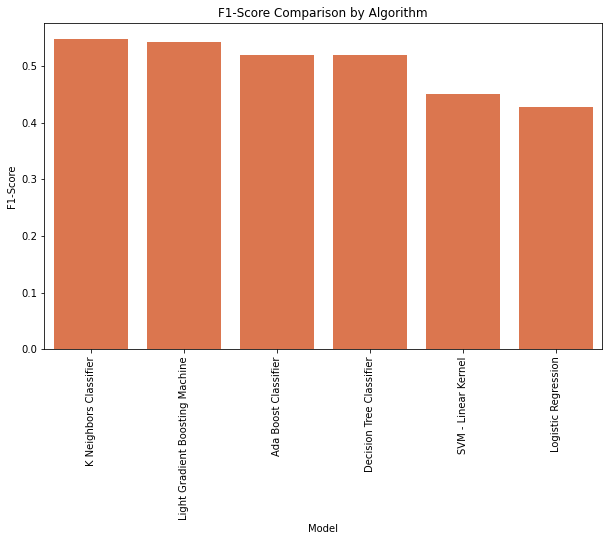

In [46]:
selected_algorithms_data = selected_algorithms_data.sort_values(by=['F1'], ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
sb.barplot(x=selected_algorithms_data.index, y='F1', data=selected_algorithms_data, color='#F26B38')

# Set the plot title and axis labels
plt.title('F1-Score Comparison by Algorithm')
plt.xlabel('Model')
plt.ylabel('F1-Score')

plt.xticks(rotation=90)

# Display the plot
plt.show()

### Comparing Kappa of each algorythm

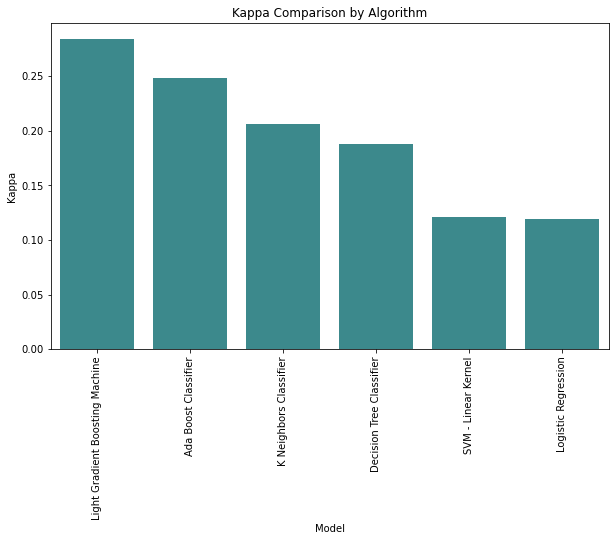

In [47]:
selected_algorithms_data = selected_algorithms_data.sort_values(by=['Kappa'], ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
sb.barplot(x=selected_algorithms_data.index, y='Kappa', data=selected_algorithms_data, color='#2F9599')

# Set the plot title and axis labels
plt.title('Kappa Comparison by Algorithm')
plt.xlabel('Model')
plt.ylabel('Kappa')

plt.xticks(rotation=90)

# Display the plot
plt.show()

### Comparing Matthews Correlation Coefficient of each algorythm

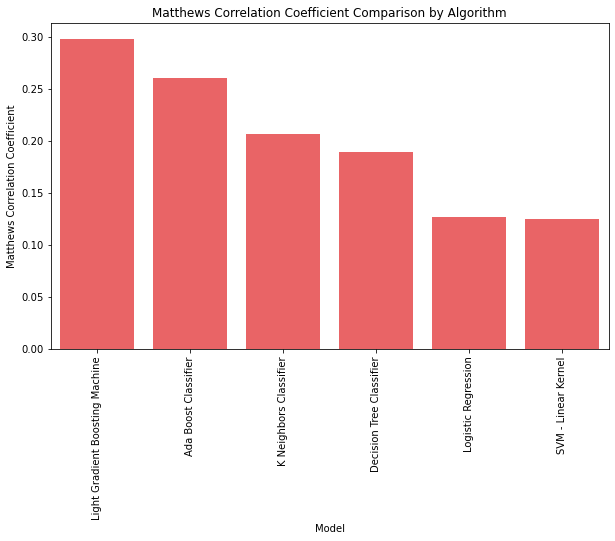

In [48]:
selected_algorithms_data = selected_algorithms_data.sort_values(by=['MCC'], ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
sb.barplot(x=selected_algorithms_data.index, y='MCC', data=selected_algorithms_data, color='#FF4E50')

# Set the plot title and axis labels
plt.title('Matthews Correlation Coefficient Comparison by Algorithm')
plt.xlabel('Model')
plt.ylabel('Matthews Correlation Coefficient')

plt.xticks(rotation=90)

# Display the plot
plt.show()

### Comparing Training Time (sec) of each algorythm

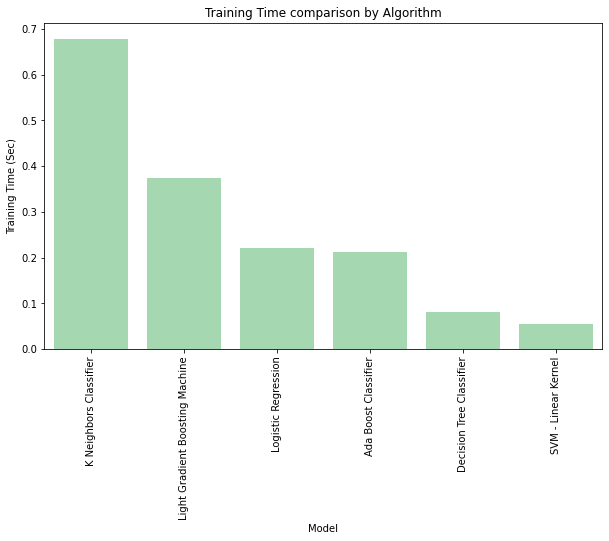

In [49]:
selected_algorithms_data = selected_algorithms_data.sort_values(by=['TT (Sec)'], ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
sb.barplot(x=selected_algorithms_data.index, y='TT (Sec)', data=selected_algorithms_data, color='#9DE0AD')

# Set the plot title and axis labels
plt.title('Training Time comparison by Algorithm')
plt.xlabel('Model')
plt.ylabel('Training Time (Sec)')

plt.xticks(rotation=90)

# Display the plot
plt.show()